In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pickle
import matplotlib.pyplot as plt

In [9]:
#loading pickle file from path on my computer
#pickle file on the github repo

df = pd.read_pickle('viral_vs_bacterial_pneumonia.txt.pkl')

In [10]:
df

,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.1,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.1,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.31,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.31,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.9,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.33,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.5,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.15,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.3,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.3,...,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.55,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.54,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.56,PAXgene.whole.blood..influenza.A.pneumonia.Day_2.ID.56,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.56,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.56,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.25,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.25,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.11,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.14
HBA_CD14+_Monocytes,6.33254976558151,6.52531870327067,5.38734790483654,6.13260704434531,5.06246833469886,5.11621499678928,4.97183021287318,5.51362204165131,5.65202423653412,5.47853353647569,...,4.28052495417402,4.07403696043854,3.89739008370802,4.36974936692714,4.947658793984,4.74106766035545,5.0303075987995,4.94119995502645,3.69269385617823,4.40077840991779
HBA_CD33+_Myeloid,5.95793377868174,6.0814391077059,5.29900091967981,5.78560222803298,4.57681225146178,4.45574981827495,4.43840310697101,4.92342035966351,4.99124251880622,4.91016311799677,...,3.9181053939505,3.86928670210689,3.63371068752011,4.09625813326482,4.58896089230147,4.43195841035448,4.63956935942755,4.5490680231594,3.35045850362645,3.98657215390161
HBA_WholeBlood,9.09060256563647,8.65609532974345,6.84928672163052,7.78005277073584,7.2300779412449,7.35784210723731,6.46451982632985,6.59439905636965,6.42666576348412,6.06859859310054,...,7.19311052705746,6.56430959995714,6.82898390492704,7.17538114184381,7.40999446521139,6.62467804814136,6.97135236550979,7.67709247099054,5.95853896236951,6.33297904044205
HBA_Bonemarrow,8.60467824911251,6.9381016447967,6.66251133139879,7.86856257279052,6.37811269966189,7.42421883117306,6.11440747616107,5.13981372416789,3.61403538340489,3.91424441842111,...,9.49697693239592,9.26079243132187,8.82036765062847,8.70751752066881,8.68117330198084,8.28565642997716,5.58216901932887,6.74923037357678,6.67247135618061,7.5934836161053
HBA_TestisGermCell,-0.729702247638765,-0.745149968519195,-0.75137018295214,-0.734702533424914,-0.741288722965477,-0.704211652631322,-0.726254393853674,-0.712747660056371,-0.747370047949211,-0.742840086013008,...,-0.349834941918984,-0.320462344718107,-0.443628666048741,-0.433616035818646,-0.390041782544181,-0.410680420093397,-0.721436166424657,-0.696064277180036,-0.602589998861397,-0.675476123547384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HBA_CD19+_BCells(neg,1.87551693501391,1.79489679805291,1.27925820598078,1.66165627012948,0.813478300080951,1.30666397294091,1.10583249870268,1.13300565257737,0.917888761482937,1.03498473896659,...,0.903026623269276,1.22034700322856,0.892356373125478,0.908300013039827,0.876118518628312,0.80945731467548,1.43897999938713,1.63886752855558,1.17174354174069,0.977709428259887
HBA_Appendix,1.25282855131349,1.0893961191791,1.04586457100333,1.22745598176144,1.2460051395249,1.40679045914709,1.19037913889405,1.34559900358868,1.32298216938431,1.35491523479196,...,1.06672792916225,0.862859775979158,0.951843544580698,0.975241126882297,0.821652777390771,1.07108439451027,1.0248586437369,1.28498364585871,1.04117353362207,1.1529553393186
RTLEP_RR2,1.33048753873873,1.17280498811835,1.0862113628271,1.20386197429169,1.31288468125849,1.35486942819364,1.26500363303621,1.29845605842285,1.39462930276972,1.41538134839817,...,1.19213808050772,0.9901795194403,1.03190604681099,1.10953057334751,0.933649829023032,1

In [12]:
# finding all the neutrophil instances within penumonia dataset

for index in df.index:
    if 'neutrophil' in index.lower():
        print(index)

WRS_Neutrophil
HPCA_Neutrophils_LPS
HPCA_Neutrophils


In [31]:
## WRS_Neutrophils
# code below is to get the standard deviation values for WRS_Neutrophils specifically for bacterial samples
new_df = df.transpose()
WRS_Neutrophil = new_df["WRS_Neutrophil"]
WRS_df = pd.DataFrame(WRS_Neutrophil)
wrs = WRS_df.transpose()
wrs

names = wrs.columns.values
influenza = []

for i in range(len(names)):
    x = names[i].find('bacterial')
    if x == -1:
        influenza.append(names[i])
for i in range(len(influenza)):
    wrs = wrs.drop([influenza[i]], axis = 1)
    
#Dataframe below 

bacterial_wrs = wrs.transpose()

#uncomment the line below to see the WRS_Neutrophil standard deviation dataframe for bacterial samples
#bacterial_wrs

In [29]:
## WRS_Neutrophils
# code below is to get the standard deviation values for WRS_Neutrophils specifically for viral samples
new_df = df.transpose()
WRS_Neutrophil = new_df["WRS_Neutrophil"]
WRS_df = pd.DataFrame(WRS_Neutrophil)
wrs = WRS_df.transpose()
wrs

names = wrs.columns.values
bacterial = []

for i in range(len(names)):
    x = names[i].find('influenza')
    if x == -1:
        bacterial.append(names[i])
for i in range(len(bacterial)):
    wrs = wrs.drop([bacterial[i]], axis = 1)
    
viral_wrs = wrs.transpose()

#line below shows WRS_Neutrophil standar deviation dataframe for viral samples
#viral_wrs

In [15]:
#getting values out of dataframe for plotting purposes

viral_wrs_values = []
for i in range(len(viral_wrs)):
    viral_wrs_values.append(float(viral_wrs.values[i][0]))
    
bacterial_wrs_values = []
for i in range(len(bacterial_wrs)):
    bacterial_wrs_values.append(float(bacterial_wrs.values[i][0]))

In [16]:
#trivial x placeholder

q = []
for i in range(25):
    q.append(i)

In [27]:
avg = sum(viral_wrs_values)/25
avg

0.36056196972515253

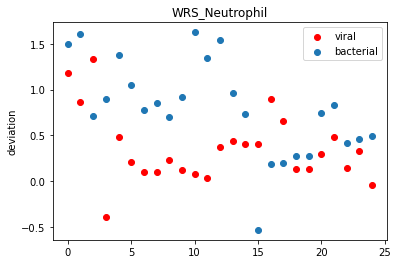

In [17]:
plt.scatter(q, viral_wrs_values, color = 'red', label = 'viral')
plt.scatter(q, bacterial_wrs_values, label = 'bacterial')
plt.title('WRS_Neutrophil')
plt.ylabel('deviation')
plt.legend(loc = 'upper right')

In [18]:
# code below is to get the standard deviation values for HPCA_Neutrophils_LPS specifically for viral samples

new_df = df.transpose()
HPCA_LPS = new_df["HPCA_Neutrophils_LPS"]
HPCA_LPS_df = pd.DataFrame(HPCA_LPS)
hpcalps = HPCA_LPS_df.transpose()
hpcalps

names = hpcalps.columns.values
bacterial_hpcalps = []

for i in range(len(names)):
    x = names[i].find('influenza')
    if x == -1:
        bacterial_hpcalps.append(names[i])
for i in range(len(bacterial_hpcalps)):
    hpcalps = hpcalps.drop([bacterial_hpcalps[i]], axis = 1)
    
viral_hpcalps_df = hpcalps.transpose()
#viral_hpcalps_df

In [19]:
# code below is to get the standard deviation values for HPCA_Neutrophils_LPS specifically for bacterial samples

new_df = df.transpose()
HPCA_LPS = new_df["HPCA_Neutrophils_LPS"]
HPCA_LPS_df = pd.DataFrame(HPCA_LPS)
hpcalps = HPCA_LPS_df.transpose()
hpcalps

names = hpcalps.columns.values
viral_hpcalps = []

for i in range(len(names)):
    x = names[i].find('bacterial')
    if x == -1:
        viral_hpcalps.append(names[i])
for i in range(len(viral_hpcalps)):
    hpcalps = hpcalps.drop([viral_hpcalps[i]], axis = 1)
    
bacterial_hpcalps_df = hpcalps.transpose()
#bacterial_hpcalps_df

In [20]:
#getting values for hpcalps to plot

viral_hpcalps_values = []
for i in range(len(viral_hpcalps)):
    viral_hpcalps_values.append(float(viral_hpcalps_df.values[i][0]))
    
bacterial_hpcalps_values = []
for i in range(len(bacterial_hpcalps)):
    bacterial_hpcalps_values.append(float(bacterial_hpcalps_df.values[i][0]))

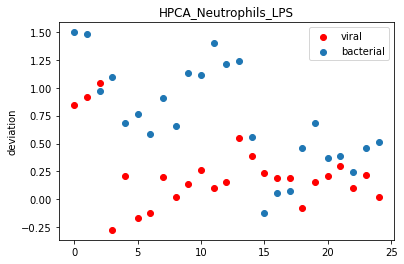

In [21]:
plt.scatter(q, viral_hpcalps_values, color = 'red', label = 'viral')
plt.scatter(q, bacterial_hpcalps_values, label = 'bacterial')
plt.title('HPCA_Neutrophils_LPS')
plt.ylabel('deviation')
plt.legend(loc = 'upper right')

In [22]:
new_df = df.transpose()
HPCA_N = new_df["HPCA_Neutrophils"]
HPCA_df = pd.DataFrame(HPCA_N)
hpca = HPCA_df.transpose()
hpca

names = hpca.columns.values
bacterial_hpca = []

for i in range(len(names)):
    x = names[i].find('influenza')
    if x == -1:
        bacterial_hpca.append(names[i])
for i in range(len(bacterial_hpca)):
    hpca = hpca.drop([bacterial_hpca[i]], axis = 1)
    
viral_hpca_df = hpca.transpose()
#viral_hpca_df

In [23]:
new_df = df.transpose()
HPCA_N = new_df["HPCA_Neutrophils"]
HPCA_df = pd.DataFrame(HPCA_N)
hpca = HPCA_df.transpose()
hpca

names = hpca.columns.values
viral_hpca = []

for i in range(len(names)):
    x = names[i].find('bacterial')
    if x == -1:
        viral_hpca.append(names[i])
for i in range(len(viral_hpca)):
    hpca = hpca.drop([viral_hpca[i]], axis = 1)
    
bacterial_hpca_df = hpca.transpose()
#bacterial_hpca_df

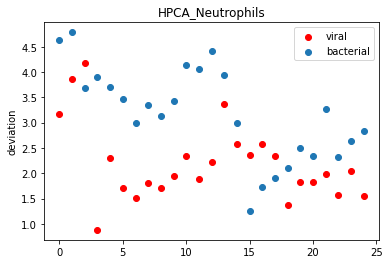

In [24]:
viral_hpca_values = []
for i in range(len(viral_hpca)):
    viral_hpca_values.append(float(viral_hpca_df.values[i][0]))
    
bacterial_hpca_values = []
for i in range(len(bacterial_hpca)):
    bacterial_hpca_values.append(float(bacterial_hpca_df.values[i][0]))

plt.scatter(q, viral_hpca_values, color = 'red', label = 'viral')
plt.scatter(q, bacterial_hpca_values, label = 'bacterial')
plt.title('HPCA_Neutrophils')
plt.ylabel('deviation')
plt.legend(loc = 'upper right')

There are three neutrophil groups displayed above (WRS_Neutrophils, HPCA_Neutrophils_LPS, HPCA_Neutrophils). Visually, we can see that there seems to be higher bacterial neutrophil levels compared to their viral counterparts. 

Further statistical analysis will be done to prove the significance of this claim. 

In [124]:
#Just finding the averages Neutrophil values for each group and the differnce between them.

avgBacWRS = sum(bacterial_wrs_values)/25
avgInfWRS = sum(viral_wrs_values)/25

print("Average Bacterial WRS Neutrophil value is: " + str(avgBacWRS))
print("Average Viral WRS Neutrophil value is: " + str(avgInfWRS))
print("Difference in WRS Neutrophil value between two groups is: " + str(avgBacWRS-avgInfWRS))
print(" ") #just a line break

avgBacLPS = sum(bacterial_hpcalps_values)/25
avgInfLPS = sum(viral_hpcalps_values)/25

print("Average Bacterial HPCA_LPS Neutrophil value is: " + str(avgBacLPS))
print("Average Viral HPCA_LPS Neutrophil value is: " + str(avgInfLPS))
print("Difference in HPCA_LPS Neutrophil value between two groups is: " + str(avgBacLPS-avgInfLPS))
print(" ") #just a line break

avgBacHPCA = sum(bacterial_hpca_values)/25
avgInfHPCA = sum(viral_hpca_values)/25

print("Average Bacterial HPCA Neutrophil value is: " + str(avgBacHPCA))
print("Average Viral HPCA Neutrophil value is: " + str(avgInfHPCA))
print("Difference in HPCA Neutrophil value between two groups is: " + str(avgBacHPCA-avgInfHPCA))
print(" ")

avgBacNeutrophil = (avgBacWRS+avgBacLPS+avgBacHPCA)/3
avgInfNeutrophil = (avgInfWRS+avgInfLPS+avgInfHPCA)/3

print("Average combined Neutrophil Signature Score for Bacterial Groups: " + str(avgBacNeutrophil))
print("Average combined Neutrophil Signature Score for Influenza Groups: " + str(avgInfNeutrophil))
print(" ")

diff = avgBacNeutrophil - avgInfNeutrophil

print("Difference in Average Combined Neutrophil Signature Scores (Bacterial-Influenza):" + str(diff))

Average Bacterial WRS Neutrophil value is: 0.7989867897722419
Average Viral WRS Neutrophil value is: 0.36056196972515253
Difference in WRS Neutrophil value between two groups is: 0.4384248200470894
 
Average Bacterial HPCA_LPS Neutrophil value is: 0.737585110896717
Average Viral HPCA_LPS Neutrophil value is: 0.23190987616250147
Difference in HPCA_LPS Neutrophil value between two groups is: 0.5056752347342155
 
Average Bacterial HPCA Neutrophil value is: 3.180533894491785
Average Viral HPCA Neutrophil value is: 2.1968403590535344
Difference in HPCA Neutrophil value between two groups is: 0.9836935354382508
 
Average combined Neutrophil Signature Score for Bacterial Groups: 1.572368598386915
Average combined Neutrophil Signature Score for Influenza Groups: 0.9297707349803961
 
Difference in Average Combined Neutrophil Signature Scores (Bacterial-Influenza):0.6425978634065188


# Largest difference observed is between the HPCA_Neutrophils groups.
<br>
<div>Average Bacterial WRS Neutrophil value is: 0.7989867897722419</div>
<div>Average Viral WRS Neutrophil value is: 0.36056196972515253</div>
<div>Difference in WRS Neutrophil value between two groups is: 0.4384248200470894</div>
 <br>
<div>Average Bacterial HPCA_LPS Neutrophil value is: 0.737585110896717</div>
<div>Average Viral HPCA_LPS Neutrophil value is: 0.23190987616250147</div>
<div>Difference in HPCA_LPS Neutrophil value between two groups is: 0.5056752347342155</div>
 <br>
<div>Average Bacterial HPCA Neutrophil value is: 3.180533894491785</div>
<div>Average Viral HPCA Neutrophil value is: 2.1968403590535344</div>
<div>Difference in HPCA Neutrophil value between two groups is: 0.9836935354382508</div>
 <br>
<div><b>Average combined Neutrophil Signature Score for Bacterial Groups:</b> 1.572368598386915</div>
<div><b>Average combined Neutrophil Signature Score for Influenza Groups:</b> 0.9297707349803961</div>
 <br>
<div><b>Difference in Average Combined Neutrophil Signature Scores (Bacterial-Influenza):</b> 0.6425978634065188</div>


# --------------------------------------------------------------------------------

# Get your boots on, cause we're going strappin'.

In [135]:
#WRS_Neutrophil
#HPCA_Neutrophils_LPS
#HPCA_Neutrophils

WRS_Neutrophil_Row = df.loc["WRS_Neutrophil"].astype(float)
WRS_Scores_Combined = np.array(0)
WRS_Scores_Combined = WRS_Neutrophil_Row.values

HPCA_LPS_Row = df.loc["HPCA_Neutrophils_LPS"].astype(float)
LPS_Scores_Combined = np.array(0)
LPS_Scores_Combined = HPCA_LPS_Row.values

HPCA_Row = df.loc["HPCA_Neutrophils"].astype(float)
HPCA_Scores_Combined = np.array(0)
HPCA_Scores_Combined = HPCA_Row.values


[ 1.49809267  1.60260895  0.71720115  0.90123378  1.18468758  1.37880754
  1.05318758  0.78192191  0.85222828  0.69659731  0.92482331  1.6268641
  1.34917624  1.53669568  0.96550396  0.8618399   1.33240353 -0.39056243
  0.73238108  0.48006759  0.21213292  0.09560462 -0.53225249  0.1857534
  0.19665556  0.10413227  0.23377165  0.11760287  0.28036324  0.27525521
  0.75019586  0.83410122  0.41223122  0.07497103  0.03266714  0.36961311
  0.44285103  0.40205011  0.41108615  0.8932327   0.66267268  0.12971267
  0.13793292  0.29474292  0.48459258  0.14757702  0.46208226  0.49296076
  0.33506837 -0.03640168]


<b> My null hypothesis is that there is no difference in WRS, HPCA_LPS, and HPCA neutrophil cell correlations between bacterial and influenza groups </b>

To test this, I will resample (with replacement) from the combined scores to create new data sets of bacteria and influenza groups (n=25 for each). The same summary statistics will be measured for each trial. I will repeat this 10,000 times to find the p-value of the observed difference in combined neutrophil signature scores from the data.

In [126]:
sampleSize = 25

#WRS Resampling

nullBacWRS = np.zeros(sampleSize)
nullInfWRS = np.zeros(sampleSize)

for i in range(0,sampleSize):
    nullBacWRS[i] = WRS_Scores_Combined[np.random.randint(0,49)]
for i in range(0,sampleSize):
    nullInfWRS[i] = WRS_Scores_Combined[np.random.randint(0,49)]

#HPCA_LPS Resampling
    
nullBacLPS = np.zeros(sampleSize)
nullInfLPS = np.zeros(sampleSize)

for i in range(0,sampleSize):
    nullBacLPS[i] = LPS_Scores_Combined[np.random.randint(0,49)]
for i in range(0,sampleSize):
    nullInfLPS[i] = LPS_Scores_Combined[np.random.randint(0,49)]

#HPCA Resampling
    
nullBacHPCA = np.zeros(sampleSize)
nullInfHPCA = np.zeros(sampleSize)

for i in range(0,sampleSize):
    nullBacHPCA[i] = HPCA_Scores_Combined[np.random.randint(0,49)]
for i in range(0,sampleSize):
    nullInfHPCA[i] = HPCA_Scores_Combined[np.random.randint(0,49)]
    
#Calculating summary statistic.

nullCombinedBacScore = ((np.sum(nullBacWRS)/25)+(np.sum(nullBacLPS)/25)+(np.sum(nullBacHPCA)/25))/3
nullCombinedInfScore = ((np.sum(nullInfWRS)/25)+(np.sum(nullInfLPS)/25)+(np.sum(nullInfHPCA)/25))/3

diff = nullCombinedBacScore - nullCombinedInfScore
print(diff)

-0.09392591718069232


In [127]:
sims = 50
sampleSize = 25
diffArray = np.zeros(sims)

for i in range(0,sims):

    nullBacWRS = np.zeros(sampleSize)
    nullInfWRS = np.zeros(sampleSize)
    nullBacLPS = np.zeros(sampleSize)
    nullInfLPS = np.zeros(sampleSize)
    nullBacHPCA = np.zeros(sampleSize)
    nullInfHPCA = np.zeros(sampleSize)

    for i in range(0,sampleSize):
        
        nullBacWRS[i] = WRS_Scores_Combined[np.random.randint(0,49)]
        nullInfWRS[i] = WRS_Scores_Combined[np.random.randint(0,49)]

        nullBacLPS[i] = LPS_Scores_Combined[np.random.randint(0,49)]
        nullInfLPS[i] = LPS_Scores_Combined[np.random.randint(0,49)]

        nullBacHPCA[i] = HPCA_Scores_Combined[np.random.randint(0,49)]
        nullInfHPCA[i] = HPCA_Scores_Combined[np.random.randint(0,49)]

    #Calculating summary statistic.

    nullCombinedBacScore = ((np.sum(nullBacWRS)/25)+(np.sum(nullBacLPS)/25)+(np.sum(nullBacHPCA)/25))/3
    nullCombinedInfScore = ((np.sum(nullInfWRS)/25)+(np.sum(nullInfLPS)/25)+(np.sum(nullInfHPCA)/25))/3

    diff = nullCombinedBacScore - nullCombinedInfScore
    diffArray[i] = diff
    print(diff)

0.2375498239269358
0.10086979374688143
0.17623037930497354
0.2457703914554743
0.02084334687656275
0.08662022109258061
-0.1640735353740519
0.09665049609397491
0.0346244366256252
-0.08695993033893124
0.12370924110784265
-0.03050702393906546
0.09886058350554561
-0.0037357436497806873
0.07536970627541595
-0.08838199433050065
-0.04231100118132103
-0.012927412416720241
0.11446511833710948
-0.12937864920984188
-0.06645473083651354
-0.15374992158847522
-0.2395079150417878
-0.06443022596974068
0.11317694009083601
0.10089285087718292
0.09555564900185609
-0.10248926676346692
-0.1408447792491656
-0.026936644634246942
0.12999816937169362
-0.23818850007213177
0.10282966857315645
0.005942140096282911
-0.20360695217706448
0.01756360849331884
-0.0598964565026483
-0.13336689732336637
-0.06825921339393992
0.1707718528882609
0.048712869323101815
0.010195125477872935
-0.005203712874925603
0.1641875902644323
-0.07829039002617133
-0.08315621970644105
0.06438930573007617
0.014425266696095784
0.004752947823233

In [130]:
#create a function that runs the resampling and returns an array of the diffs

def RunSims():
    
    sampleSize = 25
    sims = 10000
    nullsims = []
    
    for i in range(0,sims):

        nullBacWRS = np.zeros(sampleSize)
        nullInfWRS = np.zeros(sampleSize)
        nullBacLPS = np.zeros(sampleSize)
        nullInfLPS = np.zeros(sampleSize)
        nullBacHPCA = np.zeros(sampleSize)
        nullInfHPCA = np.zeros(sampleSize)

        for i in range(0,sampleSize):
            nullBacWRS[i] = WRS_Scores_Combined[np.random.randint(0,49)]
            nullInfWRS[i] = WRS_Scores_Combined[np.random.randint(0,49)]
            
            nullBacLPS[i] = LPS_Scores_Combined[np.random.randint(0,49)]
            nullInfLPS[i] = LPS_Scores_Combined[np.random.randint(0,49)]
            
            nullBacHPCA[i] = HPCA_Scores_Combined[np.random.randint(0,49)]
            nullInfHPCA[i] = HPCA_Scores_Combined[np.random.randint(0,49)]

        #Calculating summary statistic.

        nullCombinedBacScore = ((np.sum(nullBacWRS)/25)+(np.sum(nullBacLPS)/25)+(np.sum(nullBacHPCA)/25))/3
        nullCombinedInfScore = ((np.sum(nullInfWRS)/25)+(np.sum(nullInfLPS)/25)+(np.sum(nullInfHPCA)/25))/3

        diff = nullCombinedBacScore - nullCombinedInfScore
        nullsims.append(diff)
    
    return nullsims

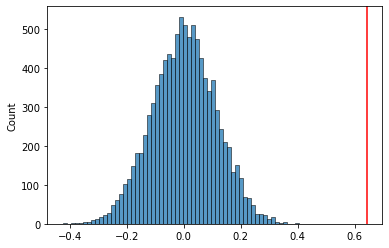

In [131]:
bootstrappedArray = RunSims()
plt = sns.histplot(data = bootstrappedArray)
plt.axvline(0.6425978634065188, color = 'red')

In [134]:
observed_diff = 0.6425978634065188
count = 0
for i in range(0,10000):
    if (bootstrappedArray[i]>observed_diff):
        count += 1
pval = count/10000
print(pval)

0.0


In [ ]:
???????